<a href="https://colab.research.google.com/github/VidushiBhatia/Customer-Segmentation/blob/main/Customer%20Segmentation%20Part%201%3A%20Data%20Prep%20%26%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A case study in hands-on end-to-end segmentation

**Part 1 - Data Pre-Processing, EDA & Feature Engineering**

[Instacart](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)



## 1. Install Relevant Packages

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
from matplotlib.pyplot import plot

## 2. Read Files and Understand Data

   * Read all the files
   * Review Tables to get a sense of the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
############################################ Helper Function 1 ############################################################
############################################### READ FILES ################################################################

def read_data(path):
  all_dfs = {}
  df = pd.DataFrame()
  files = os.listdir(path) 
  missing_value_formats = ["n.a.","?","NA","n/a", "na", "--","-"]
  
  for file in files:
    if file.endswith('.csv'):
      all_dfs[file[:file.find(".")]] = pd.read_csv(os.path.join(path,file), na_values = missing_value_formats)
  return all_dfs

############################################ Helper Function 2 ############################################################
############################################ SUMMARIZE FILES ##############################################################

def summarize_data(df):
  print("\nOverview")
  display(df.head())
  print("\nSummary")
  display(df.describe(include='all'))
  print("\nNull Values")
  display(df.isnull().sum()/len(df))

In [5]:
# Understand the available data

path = '/content/drive/MyDrive/instacart-market-basket-analysis/'
all_dfs = read_data(path)

print("\n############################## AISLES ##############################")
summarize_data(all_dfs['aisles'])
print("\n############################## DEPARTMENTS ##############################")
summarize_data(all_dfs['departments'])
print("\n############################## ORDER-PRODUCTS PRIOR ##############################")
summarize_data(all_dfs['order_products__prior'])
print("\n############################## ORDER-PRODUCTS TRAIN ##############################")
summarize_data(all_dfs['order_products__train'])
print("\n############################## ORDERS ##############################")
summarize_data(all_dfs['orders'])
print("\n############################## PRODUCTS ##############################")
summarize_data(all_dfs['products'])
print("\n############################## SAMPLE SUBMISSION ##############################")
summarize_data(all_dfs['sample_submission'])



############################## AISLES ##############################

Overview


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation



Summary


,aisle_id,aisle
count,134.000000,134
unique,NaN,134
top,NaN,water seltzer sparkling water
freq,NaN,1
mean,67.500000,NaN
std,38.826537,NaN
min,1.000000,NaN
25%,34.250000,NaN
50%,67.500000,NaN
75%,100.750000,NaN



Null Values


aisle_id    0.0
aisle       0.0
dtype: float64


############################## DEPARTMENTS ##############################

Overview


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol



Summary


,department_id,department
count,21.000000,21
unique,NaN,21
top,NaN,snacks
freq,NaN,1
mean,11.000000,NaN
std,6.204837,NaN
min,1.000000,NaN
25%,6.000000,NaN
50%,11.000000,NaN
75%,16.000000,NaN



Null Values


department_id    0.0
department       0.0
dtype: float64


############################## ORDER-PRODUCTS PRIOR ##############################

Overview


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0



Summary


,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00



Null Values


order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64


############################## ORDER-PRODUCTS TRAIN ##############################

Overview


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1



Summary


,order_id,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00



Null Values


order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64


############################## ORDERS ##############################

Overview


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0



Summary


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3421083,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
unique,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,prior,NaN,NaN,NaN,NaN
freq,NaN,NaN,3214874,NaN,NaN,NaN,NaN
mean,1.710542e+06,1.029782e+05,NaN,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,NaN,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,NaN,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,NaN,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,NaN,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,NaN,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01



Null Values


order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.060276
dtype: float64


############################## PRODUCTS ##############################

Overview


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13



Summary


,product_id,product_name,aisle_id,department_id
count,49688.000000,49688,49688.000000,49688.000000
unique,NaN,49688,NaN,NaN
top,NaN,Cinnamon Graham Crackers,NaN,NaN
freq,NaN,1,NaN,NaN
mean,24844.500000,NaN,67.769582,11.728687
std,14343.834425,NaN,38.316162,5.850410
min,1.000000,NaN,1.000000,1.000000
25%,12422.750000,NaN,35.000000,7.000000
50%,24844.500000,NaN,69.000000,13.000000
75%,37266.250000,NaN,100.000000,17.000000



Null Values


product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64


############################## SAMPLE SUBMISSION ##############################

Overview


,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259



Summary


,order_id,products
count,7.500000e+04,75000
unique,NaN,1
top,NaN,39276 29259
freq,NaN,75000
mean,1.709686e+06,NaN
std,9.878542e+05,NaN
min,1.700000e+01,NaN
25%,8.557232e+05,NaN
50%,1.710152e+06,NaN
75%,2.562794e+06,NaN



Null Values


order_id    0.0
products    0.0
dtype: float64

In [6]:
# MISSING VALUE TREATMENT

# Checking reason for Missing values and applying app missing value treatment

all_dfs['orders'].loc[all_dfs['orders']['order_number']==1, 'days_since_prior_order'] = 0
summarize_data(all_dfs['orders'])


Overview


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0



Summary


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3421083,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06
unique,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,prior,NaN,NaN,NaN,NaN
freq,NaN,NaN,3214874,NaN,NaN,NaN,NaN
mean,1.710542e+06,1.029782e+05,NaN,1.715486e+01,2.776219e+00,1.345202e+01,1.044488e+01
std,9.875817e+05,5.953372e+04,NaN,1.773316e+01,2.046829e+00,4.226088e+00,9.308727e+00
min,1.000000e+00,1.000000e+00,NaN,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,NaN,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,NaN,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,NaN,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01



Null Values


order_id                  0.0
user_id                   0.0
eval_set                  0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

<br>

**Overview of Tables**

| Table Name | Column Names | Description | Hypothesis for Data Exploration  |
| --- | --- | --- | --- | 
| aisles | aisle_id, aisle | 134 unique IDs, names for different aisles at Instacart | aisle which generates highest revenue, most frequently used aisle, distribution of<br> aisle usage based on demographics and other customer info, is there a trend of<br> aisle popularity with time of day, day of week, or any specific month of year? |
| departments | department_id, department | 21 unique IDs, names for different departments including 'missing'<br> - looks like the rolled-up metric for aisles e.g. one department might <br> have multiple aisles | revenue by dept, frequency of use by dept, distribution of dept usage based<br> on demographics and other available customer info, dept popularity by time <br>of day, day of week, or any specific month of year  |
| order-products-prior | order_id, product_id, add_to_cart_order, reordered | 32,434,489 rows at order-product level with 3,214,874 unique orders <br>for 49,677 unique products. 'add_to_cart_order' shows the order in which<br> they were added to the cart and 'reordered' | most ordered products, most frequent re-ordered products, products which <br>are only ordered once and not reordered, Number of products in one order,<br> are the products that are ordered together from the same aisle/dept? |
 | order-products-train | order_id, product_id, add_to_cart_order, reordered | Similar to df_prior_orders but only has latest order information. 1,384,617 rows<br> with 131,209 unique order IDs and 39,123  | most ordered products, most frequent re-ordered products, products <br>which are only ordered once and not reordered, Number of products in <br>one order, are the products that are ordered together from the same aisle/dept? |
| orders | order_id, user_id, eval_set,<br> order_number, order_dow,<br> order_hour_of_day, days_since_prior_order | 3,421,083 orders showing information on order ID, user ID, which evaluation<br> dataset the order is in (prior, train, test), day of week, hour of day,<br> days since prior order | Most popular day & time for placing an order, trend of day & time by products |
| products | product_id, product_name, aisle_id, department_id | 49,688 rows mapping products to aisles and departments |	covered in above metrics |

<br>

**Missing Values**

* 6% values are missing for 'days since prior order' in 'orders' df --> Given these are only for Order Number 1, we can replace missing values with '0' days
* No other missing values found in the data
* FYI - We can use Imputers from sklearn in couldn't replace our missing data with 0



## 3. Create a Master Dataset

In [7]:
# Prior and Train order datasets have the same columns orders from different time frame - These need to be concatenated

master_df = pd.concat([all_dfs['order_products__prior'], all_dfs['order_products__train']]).sort_values(by=['order_id'])

# Merge the rest of the datasets
master_df = pd.merge(left = master_df, right = all_dfs['products'],
                             left_on='product_id', right_on='product_id').sort_values(by=['order_id']).reset_index(drop=True)
master_df = pd.merge(left = master_df, right = all_dfs['aisles'],
                             left_on='aisle_id', right_on='aisle_id').sort_values(by=['order_id']).reset_index(drop=True)
master_df = pd.merge(left = master_df, right = all_dfs['departments'],
                             left_on='department_id', right_on='department_id').sort_values(by=['order_id']).reset_index(drop=True)
master_df = pd.merge(left = master_df, right = all_dfs['orders'],
                             left_on='order_id', right_on='order_id').sort_values(by=['order_id']).reset_index(drop=True)

col_order = ['user_id','order_id','product_id','aisle_id','department_id','add_to_cart_order',
 'reordered','product_name','aisle','department','eval_set','order_number','order_dow','order_hour_of_day',
 'days_since_prior_order']

master_df = master_df[col_order]

all_dfs.clear()

summarize_data(master_df)


Overview


,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,112108,1,49302,120,16,1,1,Bulgarian Yogurt,yogurt,dairy eggs,train,4,4,10,9.0
1,112108,1,49683,83,4,4,0,Cucumber Kirby,fresh vegetables,produce,train,4,4,10,9.0
2,112108,1,13176,24,4,6,0,Bag of Organic Bananas,fresh fruits,produce,train,4,4,10,9.0
3,112108,1,43633,95,15,5,1,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods,train,4,4,10,9.0
4,112108,1,10246,83,4,3,0,Organic Celery Hearts,fresh vegetables,produce,train,4,4,10,9.0



Summary


,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,33819106,33819106,33819106,33819106,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49685,134,21,2,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Banana,fresh fruits,produce,prior,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,491291,3792661,9888378,32434489,NaN,NaN,NaN,NaN
mean,1.029444e+05,1.710566e+06,2.557551e+04,7.121799e+01,9.918544e+00,8.367738e+00,5.900617e-01,NaN,NaN,NaN,NaN,1.713998e+01,2.737285e+00,1.343123e+01,1.066586e+01
std,5.946733e+04,9.874008e+05,1.409770e+04,3.819898e+01,6.281655e+00,7.139540e+00,4.918220e-01,NaN,NaN,NaN,NaN,1.749829e+01,2.093296e+00,4.246149e+00,9.081234e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.143500e+04,8.554130e+05,1.351900e+04,3.100000e+01,4.000000e+00,3.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.026260e+05,1.710660e+06,2.525600e+04,8.300000e+01,9.000000e+00,6.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,1.544120e+05,2.565587e+06,3.793500e+04,1.070000e+02,1.600000e+01,1.100000e+01,1.000000e+00,NaN,NaN,NaN,NaN,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01



Null Values


user_id                   0.0
order_id                  0.0
product_id                0.0
aisle_id                  0.0
department_id             0.0
add_to_cart_order         0.0
reordered                 0.0
product_name              0.0
aisle                     0.0
department                0.0
eval_set                  0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

## 4. EDA

* which Q is each chart answering?
* what is the answer? insight?
* identify highly correlated variables
* identify variables with (nearly) no variance

In [8]:
# Identify Primary Key
len(master_df.groupby(['user_id','order_id','product_id'], as_index=False).count())

33819106

In [9]:
# Identify unique values in columns
print ("\nNumber of Rows : ", len(master_df))
print ("Unique user_id: ", master_df['user_id'].nunique(),", % :", f"{master_df['user_id'].nunique() / len(master_df): .2%}")
print ("Unique order_id: ", master_df['order_id'].nunique(),", % :", f"{master_df['order_id'].nunique() / len(master_df): .2%}")
print ("Unique product_id: ", master_df['product_id'].nunique(),", % :", f"{master_df['product_id'].nunique() / len(master_df): .2%}")
print ("Unique aisle_id: ", master_df['aisle_id'].nunique(),", % :", f"{master_df['aisle_id'].nunique() / len(master_df): .2%}")
print ("Unique department_id: ", master_df['department_id'].nunique(),", % :", f"{master_df['department_id'].nunique() / len(master_df): .2%}")
print ("Unique add_to_cart_order: ", master_df['add_to_cart_order'].nunique(),", % :", f"{master_df['add_to_cart_order'].nunique() / len(master_df): .2%}")
print ("Unique reordered: ", master_df['reordered'].nunique(),", % :", f"{master_df['reordered'].nunique() / len(master_df): .2%}")
print ("Unique product_name: ", master_df['product_name'].nunique(),", % :", f"{master_df['product_name'].nunique() / len(master_df): .2%}")
print ("Unique aisle: ", master_df['aisle'].nunique(),", % :", f"{master_df['aisle'].nunique() / len(master_df): .2%}")
print ("Unique department: ", master_df['department'].nunique(),", % :", f"{master_df['department'].nunique() / len(master_df): .2%}")
print ("Unique eval_set: ", master_df['eval_set'].nunique(),", % :", f"{master_df['eval_set'].nunique() / len(master_df): .2%}")
print ("Unique order_number: ", master_df['order_number'].nunique(),", % :", f"{master_df['order_number'].nunique() / len(master_df): .2%}")
print ("Unique order_dow: ", master_df['order_dow'].nunique(),", % :", f"{master_df['order_dow'].nunique() / len(master_df): .2%}")
print ("Unique order_hour_of_day: ", master_df['order_hour_of_day'].nunique(),", % :", f"{master_df['order_hour_of_day'].nunique() / len(master_df): .2%}")
print ("Unique days_since_prior_order: ", master_df['days_since_prior_order'].nunique(),", % :", f"{master_df['days_since_prior_order'].nunique() / len(master_df): .2%}")




Number of Rows :  33819106
Unique user_id:  206209 , % :  0.61%
Unique order_id:  3346083 , % :  9.89%
Unique product_id:  49685 , % :  0.15%
Unique aisle_id:  134 , % :  0.00%
Unique department_id:  21 , % :  0.00%
Unique add_to_cart_order:  145 , % :  0.00%
Unique reordered:  2 , % :  0.00%
Unique product_name:  49685 , % :  0.15%
Unique aisle:  134 , % :  0.00%
Unique department:  21 , % :  0.00%
Unique eval_set:  2 , % :  0.00%
Unique order_number:  100 , % :  0.00%
Unique order_dow:  7 , % :  0.00%
Unique order_hour_of_day:  24 , % :  0.00%
Unique days_since_prior_order:  31 , % :  0.00%


In [10]:
# look at the heirarchy of products, aisles and departments

master_df.groupby(['department','aisle','product_name'], as_index = False).size()

,department,aisle,product_name,size
0,alcohol,beers coolers,'Swingtop' Premium Lager,1
1,alcohol,beers coolers,12 Oz Beer,252
2,alcohol,beers coolers,12 Oz Lager,389
3,alcohol,beers coolers,1500 Pale Ale,61
4,alcohol,beers coolers,1664,17
...,...,...,...,...
49680,snacks,trail mix snack mix,Traditional Snack Mix,2327
49681,snacks,trail mix snack mix,Trail Mix,12601
49682,snacks,trail mix snack mix,Tram Bar Peanut Butter Milk Chocolate Trail Mix,7
49683,snacks,trail mix snack mix,Tropical Trail Mix,214


In [11]:
############################################ Helper Function 3 ############################################################
############################################ VISUALIZE DATA ##############################################################

def CreateCharts (ax, data, x, y, chart_type, legend = False, size = 5, hue = None, palette=None):
    if chart_type == "scatter":
        plot = sns.scatterplot(data=data, x=x, y=y, size=size, legend=legend, 
                hue=hue, sizes=(20, 200), palette = palette, ax=ax)
    elif chart_type == "bar":
        plot = sns.barplot(x=x, y=y, data=data, 
                hue=hue, palette = palette, ax=ax, ci="sd")
    elif chart_type == "density":
        plot = sns.kdeplot(x=x, data=data, 
                shade=True, alpha=0.5, ax=ax)  
    elif chart_type == "swarm":
        plot = sns.swarmplot(x=x, y=y, hue=hue, data=data,
                      palette=palette, ax=ax)
    elif chart_type =='hist':
        plot = sns.histplot(data=data, x=x, kde=True, ax = ax, palette = palette )
    return plot

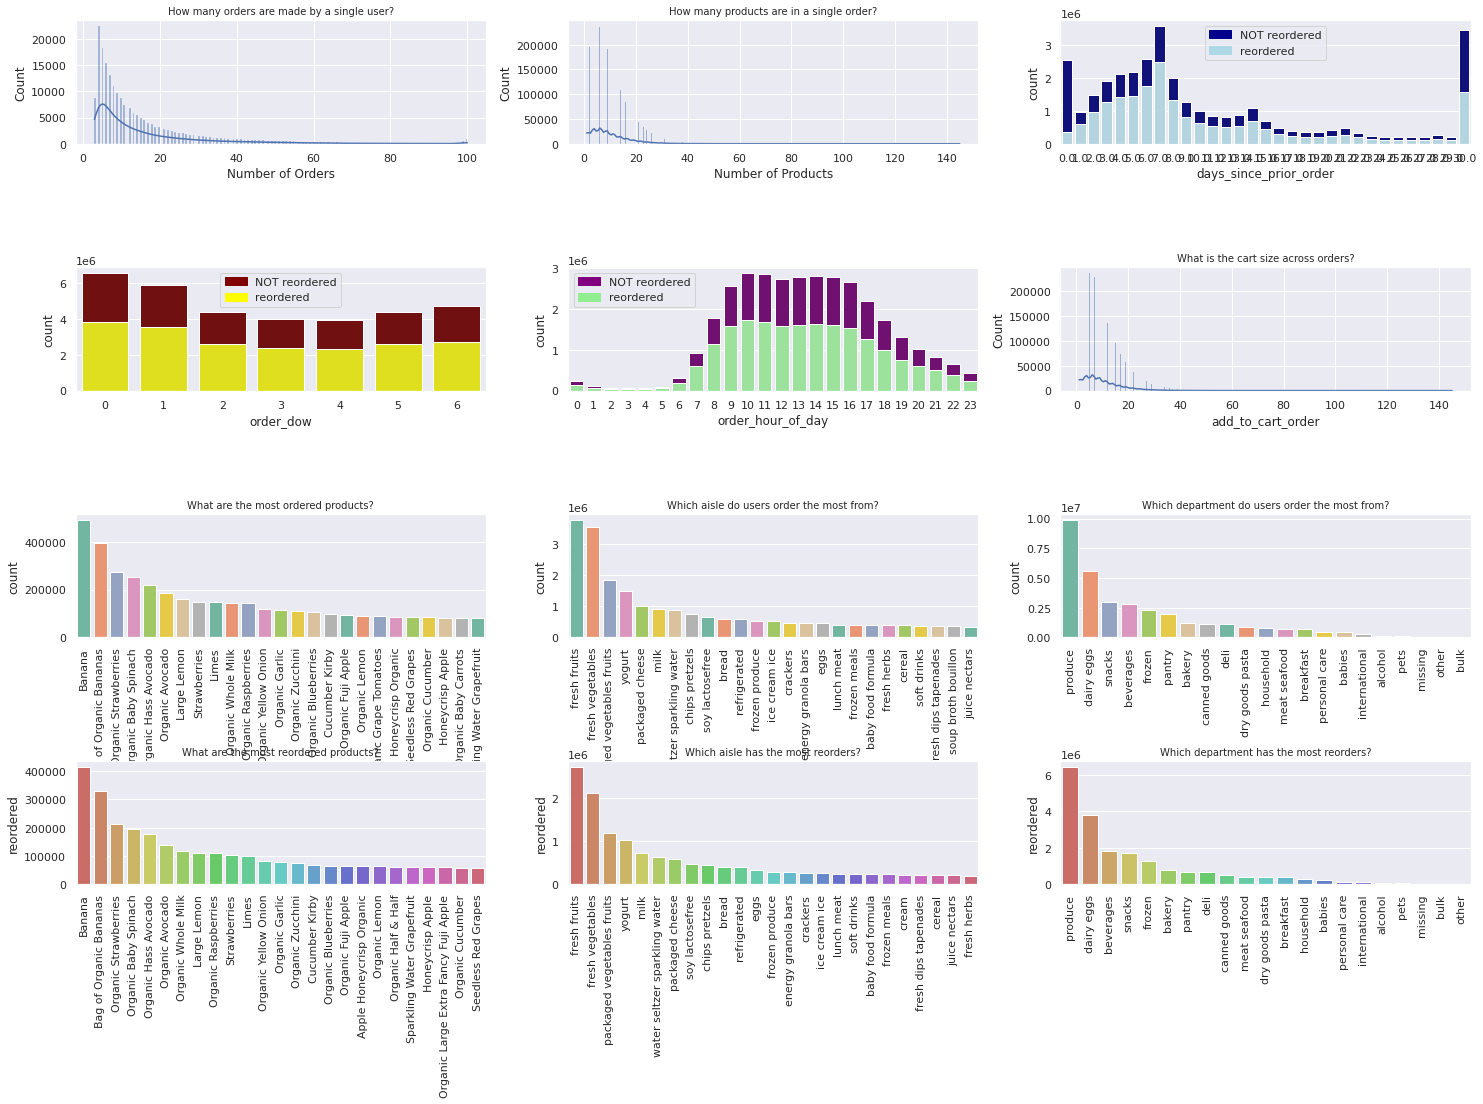

In [12]:
# 1. orders
# > Most ordered products
# > Number of products in one order
# > Trend of Orders by day and time

sns.set(style="darkgrid")
fig, ax = plt.subplots(4,3, figsize=(25,15))

# Plot 1
data = master_df[['user_id','order_id']].drop_duplicates().groupby('user_id').size().reset_index(name='Number of Orders').sort_values(by='Number of Orders', ascending=False)
ax[0,0] = CreateCharts(ax[0,0], data, x = "Number of Orders", y=None, chart_type = "hist", palette="bright")
ax[0,0].set_title('How many orders are made by a single user?', fontsize=10)


# Plot 2
data = master_df.groupby('order_id').size().reset_index(name='Number of Products').sort_values(by='Number of Products', ascending=False)
ax[0,1] = CreateCharts(ax[0,1], data, x = "Number of Products", y=None, chart_type = "hist", palette="dark")
ax[0,1].set_title('How many products are in a single order?', fontsize=10)

from matplotlib.ticker import ScalarFormatter
y_formatter = ScalarFormatter(useOffset=False)

# Plot 3
import matplotlib.patches as mpatches
data1 = master_df.groupby('days_since_prior_order', as_index=False).size()
bar1 = sns.barplot(x="days_since_prior_order",  y="size", data=data1, color='darkblue', ax=ax[0,2])
data2 = master_df[master_df['reordered']==1].groupby('days_since_prior_order', as_index=False).size()
bar2 = sns.barplot(x="days_since_prior_order",  y="size", data=data2,  color='lightblue', ax=ax[0,2])
top_bar = mpatches.Patch(color='darkblue', label='NOT reordered')
bottom_bar = mpatches.Patch(color='lightblue', label='reordered')
ax[0,2].legend(handles=[top_bar, bottom_bar])
ax[0,2].yaxis.set_major_formatter(y_formatter)
ax[0,2].set_ylabel('count')


# Plot 4

data1 = master_df.groupby('order_dow', as_index=False).size()
bar1 = sns.barplot(x="order_dow",  y="size", data=data1, color='maroon', ax=ax[1,0])
data2 = master_df[master_df['reordered']==1].groupby('order_dow', as_index=False).size()
bar2 = sns.barplot(x="order_dow",  y="size", data=data2,  color='yellow', ax=ax[1,0])
top_bar = mpatches.Patch(color='maroon', label='NOT reordered')
bottom_bar = mpatches.Patch(color='yellow', label='reordered')
ax[1,0].legend(handles=[top_bar, bottom_bar])
ax[1,0].yaxis.set_major_formatter(y_formatter)
ax[1,0].set_ylabel('count')

# Plot 5
data1 = master_df.groupby('order_hour_of_day', as_index=False).size()
bar1 = sns.barplot(x="order_hour_of_day",  y="size", data=data1, color='purple', ax=ax[1,1])
data2 = master_df[master_df['reordered']==1].groupby('order_hour_of_day', as_index=False).size()
bar2 = sns.barplot(x="order_hour_of_day",  y="size", data=data2,  color='lightgreen', ax=ax[1,1])
top_bar = mpatches.Patch(color='purple', label='NOT reordered')
bottom_bar = mpatches.Patch(color='lightgreen', label='reordered')
ax[1,1].legend(handles=[top_bar, bottom_bar])
ax[1,1].yaxis.set_major_formatter(y_formatter)
ax[1,1].set_ylabel('count')

# Plot 6
data = master_df.groupby('order_id', as_index = False)['add_to_cart_order'].max()
ax[1,2] = CreateCharts(ax[1,2], data, x = "add_to_cart_order", y=None, chart_type = "hist", palette="bright")
ax[1,2].set_title('What is the cart size across orders?', fontsize=10)


# Plot 7
data = master_df.groupby('product_name', as_index = False)['product_id'].count().sort_values(by='product_id', ascending=False)
ax[2,0] = CreateCharts(ax[2,0], data.head(25), "product_name", "product_id", "bar", palette = "Set2")
ax[2,0].set_xticklabels(data.head(25)['product_name'], rotation = 90)
ax[2,0].set_title('What are the most ordered products?', fontsize=10)
ax[2,0].set_xlabel('')
ax[2,0].set_ylabel('count')

# Plot 8
data = master_df.groupby('aisle', as_index = False)['aisle_id'].count().sort_values(by='aisle_id', ascending=False)
ax[2,1] = CreateCharts(ax[2,1], data.head(25), "aisle", "aisle_id", "bar", palette = "Set2")
ax[2,1].set_xticklabels(data.head(25)['aisle'], rotation = 90)
ax[2,1].set_title('Which aisle do users order the most from?', fontsize=10)
ax[2,1].set_xlabel('')
ax[2,1].set_ylabel('count')

# Plot 9
data = master_df.groupby('department', as_index = False)['department_id'].count().sort_values(by='department_id', ascending=False)
ax[2,2] = CreateCharts(ax[2,2], data.head(25), "department", "department_id", "bar", palette = "Set2")
ax[2,2].set_xticklabels(data.head(25)['department'], rotation = 90)
ax[2,2].set_title('Which department do users order the most from?', fontsize=10)
ax[2,2].set_xlabel('')
ax[2,2].set_ylabel('count')


# Plot 10
data = master_df.groupby('product_name', as_index = False)['reordered'].sum().sort_values(by = 'reordered', ascending=False)
ax[3,0] = CreateCharts(ax[3,0], data.head(25),'product_name' , "reordered", "bar", palette = "hls")
ax[3,0].set_xticklabels(data.head(25)['product_name'], rotation = 90)
ax[3,0].set_title('What are the most reordered products?', fontsize=10)
ax[3,0].set_xlabel('')

# Plot 11
data = master_df.groupby('aisle', as_index = False)['reordered'].sum().sort_values(by = 'reordered', ascending=False)
ax[3,1] = CreateCharts(ax[3,1], data.head(25),'aisle' , "reordered", "bar", palette = "hls")
ax[3,1].set_xticklabels(data.head(25)['aisle'], rotation = 90)
ax[3,1].set_title('Which aisle has the most reorders?', fontsize=10)
ax[3,1].set_xlabel('')

# Plot 12
data = master_df.groupby('department', as_index = False)['reordered'].sum().sort_values(by = 'reordered', ascending=False)
ax[3,2] = CreateCharts(ax[3,2], data.head(25),'department' , "reordered", "bar", palette = "hls")
ax[3,2].set_xticklabels(data.head(25)['department'], rotation = 90)
ax[3,2].set_title('Which department has the most reorders?', fontsize=10)
ax[3,2].set_xlabel('')


plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=1)

plt.show()

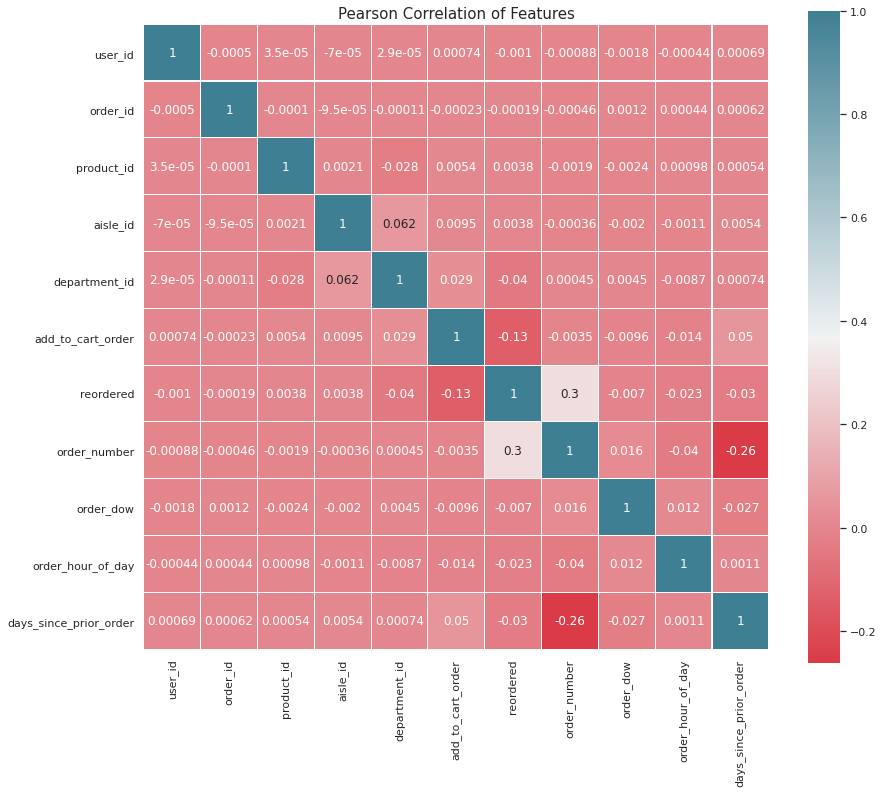

In [13]:
# Correlation
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(master_df.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

## 5. Feature Engineering

add any new variables you'd like to use -- like the ones above or RFM or use PCA to create new features

* User Features
* Product Features
* Time Features
* User-Product Features
* RFM
* remove/transform some variables (maybe your model does not like categorial variables)
* Normalize variables for k-means

In [88]:
############################################ Helper Function 4 ############################################################
################################################# RUN PCA #################################################################

def run_PCA(data, features, name):
  pca = PCA(n_components=features)
  scale_data = pd.DataFrame(scale(data), columns = data.columns, index = data.index)
  pca_output = pca.fit_transform(data)
  df_pca = pd.DataFrame(data = pca_output, columns = [name+str(i) for i in range(features)], index = data.index)
  plot(pca.explained_variance_ratio_.cumsum(), linewidth=2)
  print("\nImportance of Components")
  print(pd.DataFrame(data = pca.components_, columns = data.columns, index = ['prod_'+str(i) for i in range(features)]))
  return df_pca


Importance of Components
aisle   air fresheners candles  asian foods  ...  white wines    yogurt
prod_0                0.000464     0.020537  ...    -0.000023  0.223725
prod_1                0.001283    -0.008505  ...     0.001193  0.550046
prod_2                0.001187     0.015831  ...     0.001847  0.659729
prod_3               -0.006602    -0.028403  ...    -0.010020  0.425199
prod_4                0.000087    -0.001246  ...     0.001429 -0.096026
prod_5               -0.002983    -0.018950  ...    -0.005988  0.056591
prod_6                0.001726     0.011288  ...    -0.000044 -0.075255
prod_7               -0.002450     0.005900  ...    -0.009346  0.031027
prod_8                0.000567    -0.009695  ...     0.000479 -0.034941
prod_9               -0.006835    -0.019379  ...    -0.006629 -0.075270

[10 rows x 134 columns]

Importance of Components
department   alcohol    babies    bakery  ...      pets   produce    snacks
prod_0      0.019597  0.085530  0.289906  ...  0.041626

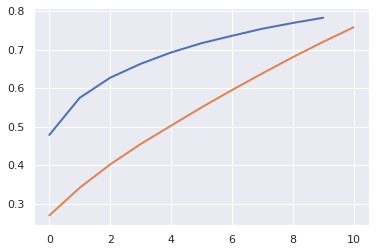

In [89]:
# PCA to find product preference
prod_pref = pd.pivot_table(master_df.groupby(['user_id','aisle'], as_index=False).size(), values='size', index='user_id',
                    columns=['aisle'], aggfunc=np.sum, fill_value=0)
prod_pref = run_PCA(prod_pref, 10, "prod_pref")

# PCA to find day preference
day_pref = pd.pivot_table(master_df, values = 'order_dow', index = 'user_id',
               columns = ['department'], aggfunc=np.median, fill_value=-1)

day_pref = run_PCA(day_pref, 11, "day_pref")

In [96]:
# Create features to demonstrate trend of products prefered by users
model_input = prod_pref.merge(day_pref, how='left', on='user_id')

# Create features to demonstrate trends of orders made by users
model_input = model_input.merge(master_df.groupby('user_id', as_index = False).agg(
              {'order_id':'count',
               'product_id':'count',
               'days_since_prior_order':'mean',
               'add_to_cart_order':'median',
               }).rename(
              columns={'order_id':'total_orders',
                       'product_id':'total_products',
                       'days_since_prior_order':'mean_days_since_prior_order',
                       'add_to_cart_order':'median_cart_size'}),
               how='left', on='user_id') 
model_input = model_input.set_index('user_id') 
model_input

,prod_pref0,prod_pref1,prod_pref2,prod_pref3,prod_pref4,prod_pref5,prod_pref6,prod_pref7,prod_pref8,prod_pref9,day_pref0,day_pref1,day_pref2,day_pref3,day_pref4,day_pref5,day_pref6,day_pref7,day_pref8,day_pref9,day_pref10,total_orders,total_products,mean_days_since_prior_order,median_cart_size
user_id,,,,,,,,,,,,,,,,,,,,,,,,,
1,-24.811636,3.449193,-1.611616,-0.470798,0.499516,-1.889152,2.687327,-3.663124,-2.655279,-1.385421,-2.484559,3.531546,3.437401,1.180813,2.823692,2.259566,2.370094,1.225474,-1.436154,0.370932,1.714975,70,70,17.828571,4.0
2,10.331587,39.529396,4.610968,14.683949,-7.375526,-2.020669,7.623389,4.111566,-9.986435,-12.395955,-0.650335,-0.082190,0.421861,2.447876,-1.095179,-1.409717,-0.825337,1.638446,0.675403,1.724550,0.046170,226,226,16.973451,8.0
3,-9.247469,2.382711,-11.077053,0.846672,-0.395448,-2.786458,-6.674629,6.069057,-2.153062,-1.617627,-5.322184,2.044431,0.279020,-0.902978,-0.517071,0.041598,2.399849,-1.381379,-1.785015,-1.796727,1.045139,88,88,10.181818,4.0
4,-29.242883,-0.880035,-1.984256,2.315424,-0.296211,0.980005,0.805137,0.717840,0.038882,-0.865174,1.708495,1.609582,3.096452,-2.062671,-2.186708,-0.916832,3.929053,-4.045666,-0.166022,1.903978,-1.158556,18,18,11.944444,2.0
5,-19.186003,-3.037864,0.186761,3.651016,0.856536,-2.306466,-5.230040,2.246242,0.925359,3.349455,-5.423025,-1.298517,-1.339562,-0.446083,-1.306621,0.964791,0.302612,-0.677271,-0.866962,-0.181487,-3.219498,46,46,9.369565,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,-20.426644,5.176025,0.814328,7.350429,-0.054101,-0.430678,-0.649813,-1.837010,0.546047,1.505526,-0.309769,-2.858887,0.919016,-0.740478,-1.212261,-5.105195,2.033463,1.068859,1.989170,-0.334299,0.620547,51,51,9.803922,7.0
206206,-6.163290,-0.200361,5.265757,-20.829030,0.906565,-13.376389,13.176732,4.437004,7.103228,-12.592193,3.114090,-0.790710,-3.241957,0.376024,-2.241623,-0.762495,0.940441,-0.185940,-0.020981,-3.020170,0.059247,285,285,3.985965,3.0
206207,7.312526,7.660423,7.951974,-5.736306,1.752449,-3.142138,-5.273990,-5.671925,2.110594,10.075284,3.599265,-3.171253,-2.490996,3.825313,-1.173977,1.715185,2.059310,1.729272,2.345883,-0.100866,0.989288,223,223,13.278027,8.0


In [97]:
# normalize everything for k-means
scaler = StandardScaler()
# transform data
model_input_scaled = pd.DataFrame(scaler.fit_transform(model_input),columns = model_input.columns, index = model_input.index)

# model_input_norm = pd.DataFrame(StandardScaler(model_input.drop(columns = 'user_id')), columns = model_input.columns, index = model_input.index)
model_input_scaled

,prod_pref0,prod_pref1,prod_pref2,prod_pref3,prod_pref4,prod_pref5,prod_pref6,prod_pref7,prod_pref8,prod_pref9,day_pref0,day_pref1,day_pref2,day_pref3,day_pref4,day_pref5,day_pref6,day_pref7,day_pref8,day_pref9,day_pref10,total_orders,total_products,mean_days_since_prior_order,median_cart_size
user_id,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.553407,0.171419,-0.108951,-0.038265,0.044941,-0.187760,0.299723,-0.416484,-0.335019,-0.183736,-0.534567,1.472965,1.562558,0.573840,1.444909,1.161150,1.249737,0.658448,-0.781358,0.207874,0.985968,-0.456298,-0.456298,0.769981,-0.575243
2,0.230439,1.964543,0.311719,1.193473,-0.663565,-0.200831,0.850251,0.467470,-1.259996,-1.643964,-0.139923,-0.034280,0.191768,1.189595,-0.560413,-0.724428,-0.435195,0.880338,0.367462,0.966456,0.026544,0.300930,0.300930,0.620318,0.739885
3,-0.206259,0.118417,-0.748851,0.068815,-0.035578,-0.276942,-0.744434,0.690030,-0.271653,-0.214531,-1.145099,0.852707,0.126836,-0.438821,-0.264590,0.021376,1.265426,-0.742215,-0.971161,-1.006905,0.600868,-0.368926,-0.368926,-0.568356,-0.575243
4,-0.652243,-0.043736,-0.134143,0.188192,-0.026650,0.097401,0.089798,0.081616,0.004906,-0.114740,0.367593,0.671337,1.407571,-1.002397,-1.118958,-0.471143,2.071766,-2.173738,-0.090326,1.067009,-0.666073,-0.708708,-0.708708,-0.259861,-1.232807
5,-0.427931,-0.150977,0.012626,0.296745,0.077061,-0.229236,-0.583316,0.255389,0.116753,0.444208,-1.166796,-0.541595,-0.608932,-0.216783,-0.668609,0.495788,0.159566,-0.363898,-0.471682,-0.101707,-1.850943,-0.572795,-0.572795,-0.710517,-0.246461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,-0.455603,0.257240,0.055052,0.597424,-0.004867,-0.042804,-0.072475,-0.208861,0.068895,0.199664,-0.066649,-1.192407,0.417762,-0.359851,-0.620325,-2.623466,1.072233,0.574298,1.082234,-0.187344,0.356763,-0.548525,-0.548525,-0.634496,0.411103
206206,-0.137468,-0.009958,0.355985,-1.692929,0.081562,-1.329460,1.469626,0.504471,0.896220,-1.669990,0.670015,-0.329796,-1.473714,0.182736,-1.147058,-0.391832,0.495889,-0.099906,-0.011415,-1.692535,0.034062,0.587318,0.587318,-1.652757,-0.904025
206207,0.163101,0.380710,0.537584,-0.466232,0.157665,-0.312292,-0.588218,-0.644877,0.266295,1.336194,0.774403,-1.322691,-1.132346,1.858989,-0.600734,0.881402,1.085862,0.929139,1.276308,-0.056527,0.568758,0.286368,0.286368,-0.026456,0.739885


## Next Blog

### Unsupervised - Clustering
* Unsupervised - Feature Selection Use this link for feature importance -- https://towardsdatascience.com/a-starter-pack-to-exploratory-data-analysis-with-python-pandas-seaborn-and-scikit-learn-a77889485baf#3534
* Unsupervised - Model Selection, Cost Function, Optimization, Accuracy Metric 
* Unsupervised - Modelling
* Unsupervised - Predict
* Unsupervised - Narrative for each segment

### Convert into Supervised for Prediction
* Use GridSearchCV and RandomForest, XGBoost